In [5]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import operator 
from data.get_mnist import get_mnist


In [6]:
X_train, y_train = get_mnist("train", False)[:1000]
X_test, y_test = get_mnist("test", False)[:200]
X_train = X_train[:1000]
y_train = y_train[:1000]
X_test = X_test[:200]
y_test = y_test[:200]
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    # init
    def __init__(self, K=3):
        self.K = K
        self.X_train = X_train
        self.y_train = y_train
    # fit    
    def fit(self, X_train, y_train):
            self.X_train = X_train
            self.y_train = y_train
            
    # predict
    def predict(self, X_test):
        predictions = [] 
        for i in range(len(X_test)):
            dist = np.array([euc_dist(X_test[i], x_t) for x_t in self.X_train])
            dist_sorted = dist.argsort()[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                if self.y_train[idx] in neigh_count:
                    neigh_count[self.y_train[idx]] += 1
                else:
                    neigh_count[self.y_train[idx]] = 1
            sorted_neigh_count = sorted(neigh_count.items(),    
            key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions

In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1000, 784) (1000,)
(200, 784) (200,)


In [8]:
kVals = np.arange(3,100,2)
accuracies = []
for k in kVals:
  model = KNN(K = k)
  model.fit(X_train, y_train)
  pred = model.predict(X_train)
  acc = accuracy_score(y_train, pred)
  accuracies.append(acc)
  print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 3; Accuracy: 0.954


KeyboardInterrupt: 

In [ ]:
max_index = accuracies.index(max(accuracies))
print(max_index)

0


Text(0, 0.5, 'Accuracy')

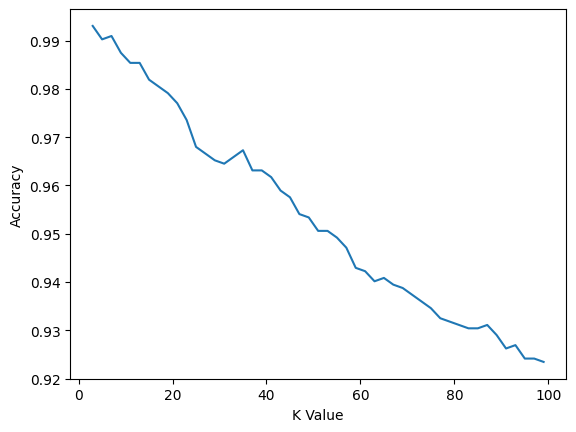

In [ ]:
plt.plot(kVals, accuracies) 
plt.xlabel("K Value") 
plt.ylabel("Accuracy")

In [ ]:
model = KNN(K = 3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, pred)
print("Precision \n", precision)
print("\nRecall \n", recall)
print("\nF-score \n", fscore)

Precision 
 [1.         0.96551724 1.         0.97142857 0.9787234  0.9787234
 0.97222222 1.         1.         0.97368421]

Recall 
 [1.         1.         1.         1.         1.         0.9787234
 1.         0.97058824 0.96666667 0.925     ]

F-score 
 [1.         0.98245614 1.         0.98550725 0.98924731 0.9787234
 0.98591549 0.98507463 0.98305085 0.94871795]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


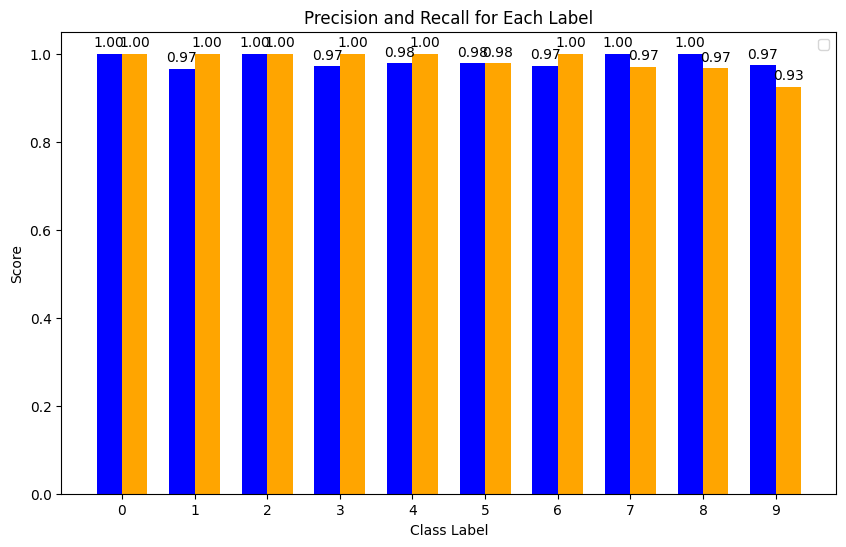

In [ ]:
labels = np.unique(y_test)
width = 0.35  # Độ rộng của mỗi cột

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(labels - width/2, precision, width, color='blue')
bar2 = ax.bar(labels + width/2, recall, width, color='orange')

# Hiển thị giá trị trên mỗi cột
for bar in [bar1, bar2]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_title('Precision and Recall for Each Label')
ax.set_xlabel('Class Label')
ax.set_ylabel('Score')
ax.set_xticks(labels)
ax.legend()
plt.show()